In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import numpy as np

In [110]:
#Datei einlesen
df = pd.read_csv("heart3.csv")
#df = pd.read_csv("/Users/aurelia/Documents/GitHub/Asai-Projekt/heart3.csv")
df_orginal = df.copy()

In [111]:
#DataFrame-Beispiel Daten
styled_df = df.head(10).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})

styled_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.000000,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.000000,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.000000,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.500000,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.000000,Up,0


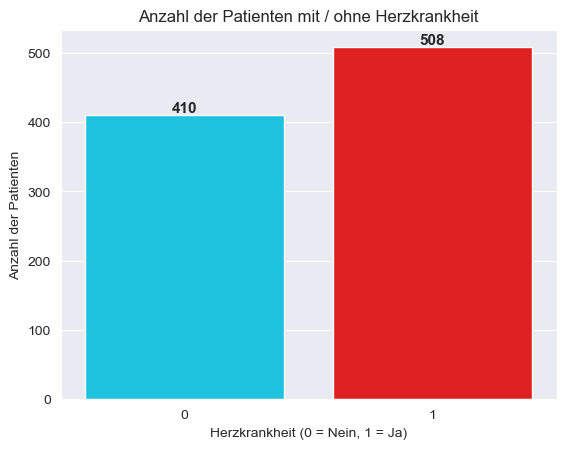

Anzahl der Zeilen (Patienten): 918
Anzahl der Spalten (Features): 12


In [112]:
#Balkendiagramm Anteil Herzerkrankte

# Balkendiagramm OHNE FutureWarning
ax = sns.countplot(x='HeartDisease', hue='HeartDisease', data=df, palette=['#00d9ff', '#ff0000'], legend=False)


# Achsentitel
plt.title('Anzahl der Patienten mit / ohne Herzkrankheit')
plt.xlabel('Herzkrankheit (0 = Nein, 1 = Ja)')
plt.ylabel('Anzahl der Patienten')

# Zahlen über Balken schreiben
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')

# Plot anzeigen
plt.show()
print(f"Anzahl der Zeilen (Patienten): {df.shape[0]}")
print(f"Anzahl der Spalten (Features): {df.shape[1]}")

In [113]:
# Daten Vorverarbeitung
# Duplikate checken
# Alle duplizierten Zeilen (inkl. Erstvorkommen)
duplikate_df = df[df.duplicated(keep=False)]

# Anzahl und Prozent Duplikate
anzahl_duplikate = len(duplikate_df)
gesamt = len(df)
prozent_duplikate = (anzahl_duplikate / gesamt) * 100

# Verteilung HeartDisease in den Duplikaten
verteilung_duplikate = duplikate_df['HeartDisease'].value_counts(normalize=True) * 100

# Verteilung HeartDisease im gesamten DataFrame
verteilung_gesamt = df['HeartDisease'].value_counts(normalize=True) * 100

# Ausgabe
print("Gesamtzeilen:", gesamt)
print("Anzahl mehrfach vorkommender Zeilen:", anzahl_duplikate)
print(f"Prozent mehrfach vorkommend: {prozent_duplikate:.2f}%\n")

print("Verteilung von Heartdisease innerhalb der Duplikate:")
if not verteilung_duplikate.empty:
    for wert, proz in verteilung_duplikate.items():
        print(f"  {wert}: {proz:.2f}%")
else:
    print("    - - -")

print("\nGesamtverteilung HeartDisease:")
for wert, proz in verteilung_gesamt.items():
    print(f"  {wert}: {proz:.2f}%")

Gesamtzeilen: 918
Anzahl mehrfach vorkommender Zeilen: 0
Prozent mehrfach vorkommend: 0.00%

Verteilung von Heartdisease innerhalb der Duplikate:
    - - -

Gesamtverteilung HeartDisease:
  1: 55.34%
  0: 44.66%


In [114]:
# Duplikate entfernen
df = df.drop_duplicates()


In [115]:
# Fehlende Werte prüfen
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [116]:
# Typprüfung
# also ob wirklich die im Datensatz angegebenen Datentypen und beizeichnungen stimmen
def check_values(df, column_type, valid_values):
    if column_type not in df.columns:
        print(f"Spalte '{column_type}' nicht im Datensatz gefunden.")
        return

    values = df[column_type].dropna().unique()
    invalid = set(values).difference(set(valid_values))
    if invalid:
         print(f" Ungültige Werte in Spalte '{column_type}': {(invalid)} ")
    else:
        print(f"Alle Werte in Spalte '{column_type}' sind gültig ")

valid_values_dict = {
    "Sex": {'M', 'F'},
    "ChestPainType": {'TA', 'ATA', 'NAP', 'ASY'},
    "RestingECG": {'Normal', 'ST', 'LVH'},
    "ExerciseAngina": {'Y', 'N'},
    "ST_Slope": {'Up', 'Flat', 'Down'}
}
def check_if_numeric (df, column_type, valid_values):
    if column_type not in df.columns:
        print(f"Spalte {column_type}' nicht im Datensatz gefunden.")
        return
    else:
        non_numeric = df[column_type].dropna().apply(lambda x: not isinstance(x, (int, float)))
        if non_numeric.any():
            count_invalid = non_numeric.sum()
            print(f"{count_invalid} nicht numerische Werte in Spalte '{column_type}'")
            print(f"Beispiele: {df[column_type][non_numeric].unique()[:5]}")
        else:
            print(f"Alle Werte in Spalte '{column_type}' sind numerisch.")

numeric_columns = [
    'Age',
    'RestingBP',
    'Cholesterol',
    'FastingBS',
    'MaxHR',
    'Oldpeak',
    'HeartDisease'
]
# Anwendung:
for column, valid_set in valid_values_dict.items():
    check_values(df, column, valid_set)

for col in numeric_columns:
    check_if_numeric(df, col, numeric_columns)

Alle Werte in Spalte 'Sex' sind gültig 
Alle Werte in Spalte 'ChestPainType' sind gültig 
Alle Werte in Spalte 'RestingECG' sind gültig 
Alle Werte in Spalte 'ExerciseAngina' sind gültig 
Alle Werte in Spalte 'ST_Slope' sind gültig 
Alle Werte in Spalte 'Age' sind numerisch.
Alle Werte in Spalte 'RestingBP' sind numerisch.
Alle Werte in Spalte 'Cholesterol' sind numerisch.
Alle Werte in Spalte 'FastingBS' sind numerisch.
Alle Werte in Spalte 'MaxHR' sind numerisch.
Alle Werte in Spalte 'Oldpeak' sind numerisch.
Alle Werte in Spalte 'HeartDisease' sind numerisch.


In [117]:
# Unrealistische Werte
limits = {
    'Age': (0, 120),
    'RestingBP': (40, 150),
    'Cholesterol': (1, 800),
    'MaxHR': (60, 202),
    'Oldpeak': (0, 5)
}

print(f"Anzahl an Zeilen (vorher): {len(df)}")

def show_outliers(df, limits_dict):
    for col, (min_val, max_val) in limits_dict.items():
        invalid = df[(df[col] < min_val) | (df[col] > max_val)][col]
        print(f"{col}: {len(invalid)} Werte außerhalb ({min_val}–{max_val})")
        if not invalid.empty:
            print(f"    Beispiele: {invalid.unique()[:5]}")


def remove_outliers(df, limits_dict):
    condition = pd.Series([True] * len(df))
    for col, (min_val, max_val) in limits_dict.items():
        condition &= df[col].between(min_val, max_val)

    return df[condition]

def clip_outliers(df, limits_dict):
    df_clipped = df.copy()
    for col, (min_val, max_val) in limits_dict.items():
        before = df_clipped[col]
        below = before < min_val
        above = before > max_val

        df_clipped[col] = before.clip(lower=min_val, upper=max_val)
    print("\nClipping angewenden:")
    df = df_clipped
    show_outliers(df, limits)
    return df_clipped

show_outliers(df, limits)
clip_outliers(df, limits)
print(f"\nNeue Anzahl an Zeilen (nach Filter): {len(df)}")

Anzahl an Zeilen (vorher): 918
Age: 0 Werte außerhalb (0–120)
RestingBP: 118 Werte außerhalb (40–150)
    Beispiele: [160 170 190 180 155]
Cholesterol: 172 Werte außerhalb (1–800)
    Beispiele: [0]
MaxHR: 0 Werte außerhalb (60–202)
Oldpeak: 15 Werte außerhalb (0–5)
    Beispiele: [-0.9 -2.6 -1.5 -0.1 -1. ]

Clipping angewenden:
Age: 0 Werte außerhalb (0–120)
RestingBP: 0 Werte außerhalb (40–150)
Cholesterol: 0 Werte außerhalb (1–800)
MaxHR: 0 Werte außerhalb (60–202)
Oldpeak: 0 Werte außerhalb (0–5)

Neue Anzahl an Zeilen (nach Filter): 918


=== Altersverteilung ===
count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64


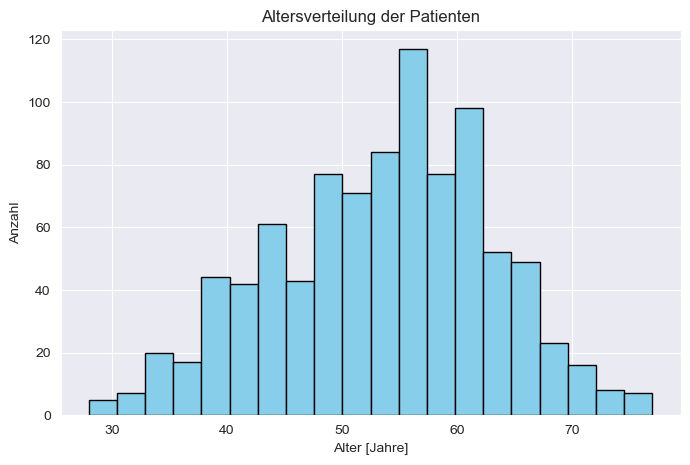

In [118]:
#Bias/Korrelation

print("=== Altersverteilung ===")
print(df['Age'].describe())

plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Altersverteilung der Patienten')
plt.xlabel('Alter [Jahre]')
plt.ylabel('Anzahl')
plt.show()

=== Geschlechterverteilung ===
M: 725 Patienten (78.98%)
F: 193 Patienten (21.02%)


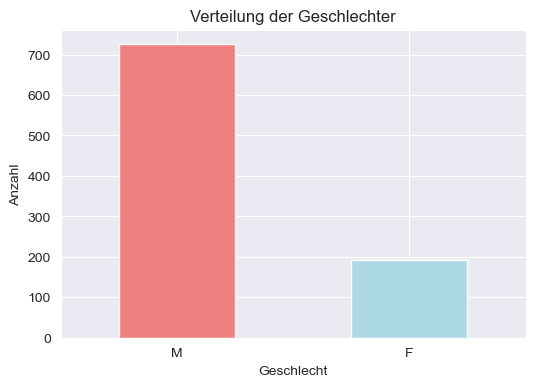

In [119]:
print("=== Geschlechterverteilung ===")
gender_counts = df['Sex'].value_counts()
gender_percent = df['Sex'].value_counts(normalize=True) * 100

for sex in gender_counts.index:
    print(f"{sex}: {gender_counts[sex]} Patienten ({gender_percent[sex]:.2f}%)")

plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Verteilung der Geschlechter')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)
plt.show()


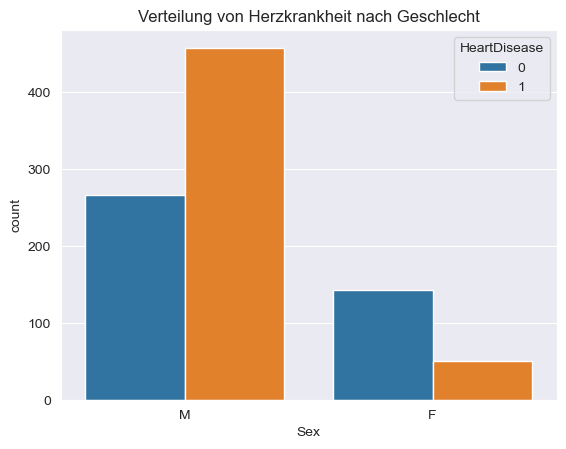

Sex
F    0.259067
M    0.631724
Name: HeartDisease, dtype: float64


In [120]:
# Bias: Zielverteilung nach Geschlecht
sns.countplot(data=df, x='Sex', hue='HeartDisease')
plt.title("Verteilung von Herzkrankheit nach Geschlecht")
plt.show()

# Diagnosewahrscheinlichkeit pro Geschlecht
print(df.groupby("Sex")["HeartDisease"].mean())

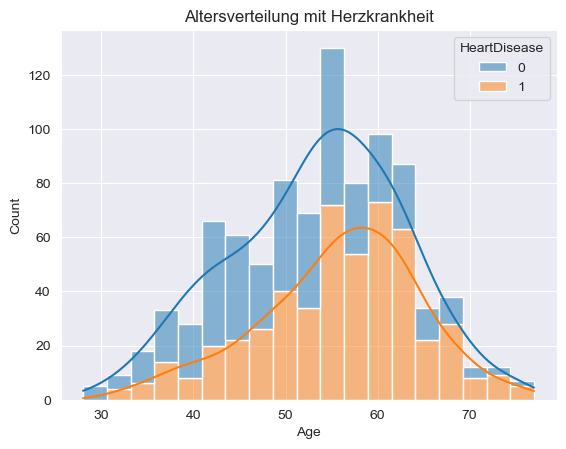

Age_cat
20–30    0.000000
31–40    0.363636
41–50    0.417040
51–60    0.582677
61–80    0.728507
Name: HeartDisease, dtype: float64


In [121]:
#Bias: Altersverteilung mit/ohne Herzkrankheit
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True, multiple='stack')
plt.title("Altersverteilung mit Herzkrankheit")
plt.show()

# Altersgruppenbildung für Analyse
df['Age_cat'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 80],
                        labels=["20–30", "31–40", "41–50", "51–60", "61–80"])
print(df.groupby("Age_cat", observed=True)["HeartDisease"].mean())


In [122]:
# Anteil Herzkrankheiten bei Fasting Blood Sugar hoch/niedrig
print(df.groupby("FastingBS")["HeartDisease"].mean())


FastingBS
0    0.480114
1    0.794393
Name: HeartDisease, dtype: float64


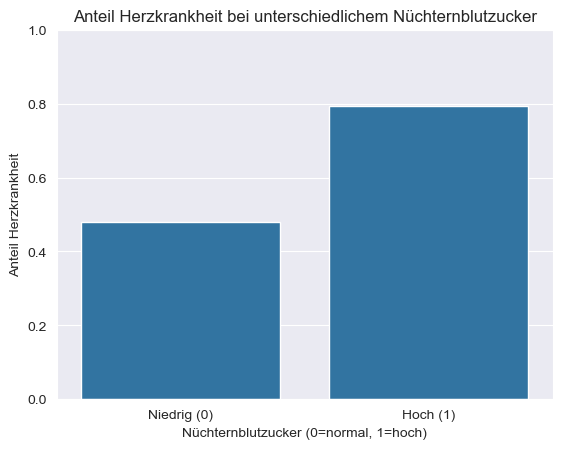

FastingBS
0    0.480114
1    0.794393
Name: HeartDisease, dtype: float64


In [123]:
# Anteil Herzkrankheiten pro Nüchternblutzucker
heart_disease_rate = df.groupby("FastingBS")["HeartDisease"].mean().reset_index()

# Plot mit Seaborn
sns.barplot(data=heart_disease_rate, x="FastingBS", y="HeartDisease")

plt.xticks([0, 1], ['Niedrig (0)', 'Hoch (1)'])
plt.ylabel("Anteil Herzkrankheit")
plt.xlabel("Nüchternblutzucker (0=normal, 1=hoch)")
plt.title("Anteil Herzkrankheit bei unterschiedlichem Nüchternblutzucker")
plt.ylim(0, 1)  # y-Achse von 0 bis 1
plt.show()

print(df.groupby("FastingBS")["HeartDisease"].mean())

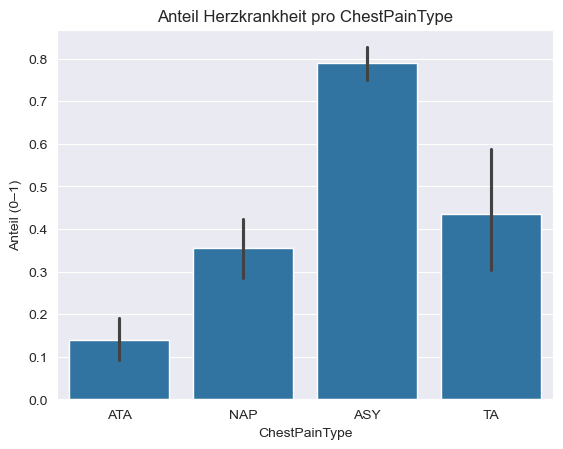

Anteil an Herzkrankheiten (%) pro ChestPainType:

ChestPainType
ASY    79.03
TA     43.48
NAP    35.47
ATA    13.87
Name: HeartDisease, dtype: float64


In [124]:
# Kreuztabelle: Anzahl Herzkrankheiten pro ChestPainType
#pd.crosstab(df['ChestPainType'], df['HeartDisease'], normalize='index') * 100

#  Anteil Herzkrankheit je ChestPainType
sns.barplot(
    data=df,
    x='ChestPainType',
    y='HeartDisease',
    estimator=lambda x: sum(x) / len(x)  # Mittelwert = Anteil Herzkrankheit
)
plt.title("Anteil Herzkrankheit pro ChestPainType")
plt.ylabel("Anteil (0–1)")
plt.show()

# Prozentsatz Herzkrankheit pro ChestPainType
heart_disease_by_cp = df.groupby("ChestPainType")["HeartDisease"].mean().sort_values(ascending=False) * 100

print("Anteil an Herzkrankheiten (%) pro ChestPainType:\n")
print(heart_disease_by_cp.round(2))

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Beispielhafte Feature-Liste (evtl. anpassen)
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
            'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

# Kategorische Features umwandeln
df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Gesamtergebnis:")
print(classification_report(y_test, y_pred))


Gesamtergebnis:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       103
           1       0.90      0.91      0.90       127

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230



In [126]:
# Feature Engineering

# Resting BP
def restingBP_categorization(bp):
    if bp < 120:
        return 100
    elif 120<= bp <= 129:
        return 125
    elif 130<= bp <= 139:
        return 135
    elif 140<= bp <= 179:
        return 160
    else: return 190

df['RestingBP'] = df['RestingBP'].apply(restingBP_categorization)

"""
# Cholesterol
def cholesterol_categorization(cholesterol):
    if cholesterol < 200:
        return 100
    elif 200<= cholesterol <= 239:
        return 220
    else: return 450

df['Cholesterol'] = df['Cholesterol'].apply(cholesterol_categorization)
"""
def cholesterol_category_by_age(row):
    age = row['Age']
    sex = row['Sex']
    chol = row['Cholesterol']

    # Wertebereiche laut Tabelle (vereinfacht)
    if sex == 'M':  # Männer
        if age < 40:
            min_val, max_val = 150, 220
        elif age < 50:
            min_val, max_val = 160, 240
        elif age < 60:
            min_val, max_val = 170, 240
        else:
            min_val, max_val = 175, 240
    else:  # Frauen
        if age < 40:
            min_val, max_val = 150, 240
        elif age < 50:
            min_val, max_val = 160, 240
        elif age < 60:
            min_val, max_val = 170, 260
        else:
            min_val, max_val = 195, 270

    if chol < min_val:
        return 0
    elif chol > max_val:
        return 1
    else:
        return 0.5

df['Cholesterol_cat_age'] = df.apply(cholesterol_category_by_age, axis=1)

# Max HR
def maxhr_age_category(row):
    maxhr = row['MaxHR']
    age = row['Age']
    expected_maxhr = 220 - age

    if maxhr < 0.7 * expected_maxhr:
        return 1
    elif 0.7 * expected_maxhr <= maxhr <= expected_maxhr:
        return 2
    elif expected_maxhr < maxhr <= 1.1 * expected_maxhr:
        return 3
    else:
        return 4

df['MaxHR'] = df.apply(maxhr_age_category, axis=1)


def age_category(age_group):
    if age_group == '20–30':
        return 25
    elif age_group == '31–40':
        return 36
    elif age_group == '41–50':
        return 46
    elif age_group == '51–60':
        return 56
    elif age_group == '61–80':
        return 70
    else:
        return 0

df['Age_cat'] = df['Age_cat'].apply(age_category)

#One Hot Encoding bei Nominalen Kategorien
# One-Hot-Encoding für nominale Kategorien
df = pd.get_dummies(df, columns=["ChestPainType", "RestingECG", "ST_Slope"], drop_first=True, dtype=int)
"""
#ChestpainType
chest_pain_map = {
    "TA": 0,   # Typical Angina
    "ATA": 1,  # Atypical Angina
    "NAP": 2,  # Non-Anginal Pain
    "ASY": 3   # Asymptomatic
}

df["ChestPainType"] = df["ChestPainType"].map(chest_pain_map)

#Resting ECG
resting_ecg_map = {
    "Normal": 0,
    "ST": 1,
    "LVH": 2
}

df["RestingECG"] = df["RestingECG"].map(resting_ecg_map)

# ST_Slope
st_slope_map = {
    "Up": 0,
    "Flat": 1,
    "Down": 2
}

df["ST_Slope"] = df["ST_Slope"].map(st_slope_map)
"""

# Mapping für Sex (Männlich = 1, Weiblich = 0)
df["Sex"] = df["Sex"].map({'M': 1, 'F': 0})

# Mapping für ExerciseAngina (Ja = 1, Nein = 0)
df["ExerciseAngina"] = df["ExerciseAngina"].map({'Y': 1, 'N': 0})

styled_df = df.head(10).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})

styled_df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Age_cat,Cholesterol_cat_age,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,160,289,0,2,0,0.000000,0,36,1.000000,1,0,0,1,0,0,1
1,49,0,160,180,0,2,0,1.000000,1,46,0.500000,0,1,0,1,0,1,0
2,37,1,135,283,0,1,0,0.000000,0,36,1.000000,1,0,0,0,1,0,1
3,48,0,135,214,0,1,1,1.500000,1,46,0.500000,0,0,0,1,0,1,0
4,54,1,160,195,0,2,0,0.000000,0,56,0.500000,0,1,0,1,0,0,1
5,39,1,125,339,0,2,0,0.000000,0,36,1.000000,0,1,0,1,0,0,1
6,45,0,135,237,0,2,0,0.000000,0,46,0.500000,1,0,0,1,0,0,1
7,54,1,100,208,0,2,0,0.000000,0,56,0.500000,1,0,0,1,0,0,1
8,37,1,160,207,0,2,1,1.500000,1,36,0.500000,0,0,0,1,0,1,0
9,48,0,125,284,0,1,0,0.000000,0,46,1.000000,1,0,0,1,0,0,1


In [127]:
#Skalieren
scaler = MinMaxScaler()
scale_cols = ["RestingBP", "Cholesterol", "MaxHR", "ExerciseAngina", "Oldpeak", "Age_cat", "ChestPainType_ATA", "ChestPainType_NAP", "ChestPainType_TA", "RestingECG_Normal", "RestingECG_ST", "ST_Slope_Flat", "ST_Slope_Up"]
df[scale_cols] = scaler.fit_transform(df[scale_cols])

styled_df = df.head(10).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})

styled_df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Age_cat,Cholesterol_cat_age,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,0.666667,0.479270,0,0.333333,0.000000,0.295455,0,0.244444,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
1,49,0,0.666667,0.298507,0,0.333333,0.000000,0.409091,1,0.466667,0.500000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
2,37,1,0.388889,0.469320,0,0.000000,0.000000,0.295455,0,0.244444,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
3,48,0,0.388889,0.354892,0,0.000000,1.000000,0.465909,1,0.466667,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
4,54,1,0.666667,0.323383,0,0.333333,0.000000,0.295455,0,0.688889,0.500000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
5,39,1,0.277778,0.562189,0,0.333333,0.000000,0.295455,0,0.244444,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
6,45,0,0.388889,0.393035,0,0.333333,0.000000,0.295455,0,0.466667,0.500000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
7,54,1,0.000000,0.344942,0,0.333333,0.000000,0.295455,0,0.688889,0.500000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
8,37,1,0.666667,0.343284,0,0.333333,1.000000,0.465909,1,0.244444,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
9,48,0,0.277778,0.470978,0,0.000000,0.000000,0.295455,0,0.466667,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Beste Parameterkombination (grid_search.best_params_):
  bootstrap: True
  max_depth: 10
  max_features: sqrt
  min_samples_leaf: 2
  min_samples_split: 2
  n_estimators: 100

Bester CV-Score (grid_search.best_score_): 0.8720


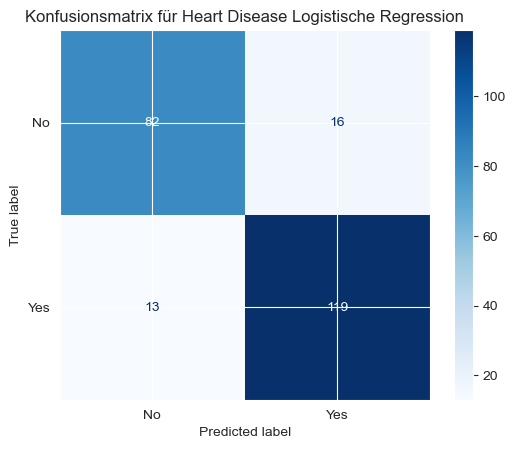

Genauigkeit: 0.8739130434782608

Fairness-Analyse nach 'Sex':
     accuracy  precision    recall  selection_rate
Sex                                               
0    0.769231   0.538462  0.700000        0.333333
1    0.895288   0.918033  0.918033        0.638743
Demographic Parity Difference: 0.305


In [128]:
#Random Forest mit Gridsearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, true_positive_rate

# 1. Daten vorbereiten: Heartdisease spalte und alte age Spalte entfernen
X = df.drop(columns=['HeartDisease', 'Age'])
y = df['HeartDisease']

# 2. Trainings-/Testdaten Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Parametergrid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# 4. Random Forest mit GridSearchCV
rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

# 5. Beste Parameter und beste Score ausgeben
print("Beste Parameterkombination (grid_search.best_params_):")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBester CV-Score (grid_search.best_score_): {grid_search.best_score_:.4f}")
# 6. Modell evaluieren
best_model = grid_search.best_estimator_
y_pred_rand = best_model.predict(X_test)

#7. Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred_rand)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Konfusionsmatrix für Heart Disease Logistische Regression')
plt.show()

accuracy = accuracy_score(y_test, y_pred_rand)
print("Genauigkeit:", accuracy)

#8. Fairness-Analyse nach Geschlecht
# Sensitives Merkmal extrahieren (Sex)
sensitive_feature = df.loc[X_test.index, "Sex"]  # 0 = Female, 1 = Male

# MetricFrame mit Gruppenvergleich
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "selection_rate": selection_rate
}

frame = MetricFrame(metrics=metrics, y_true=y_test, y_pred=y_pred_rand, sensitive_features=sensitive_feature)

print("\nFairness-Analyse nach 'Sex':")
print(frame.by_group)

dp_diff = demographic_parity_difference(y_test, y_pred_rand, sensitive_features=sensitive_feature)
print(f"Demographic Parity Difference: {dp_diff:.3f}")


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Beste Parameterkombination (grid_search.best_params_):
  bootstrap: True
  max_depth: None
  max_features: sqrt
  min_samples_leaf: 2
  min_samples_split: 5
  n_estimators: 100

Bester CV-Score (grid_search.best_score_): 0.8735


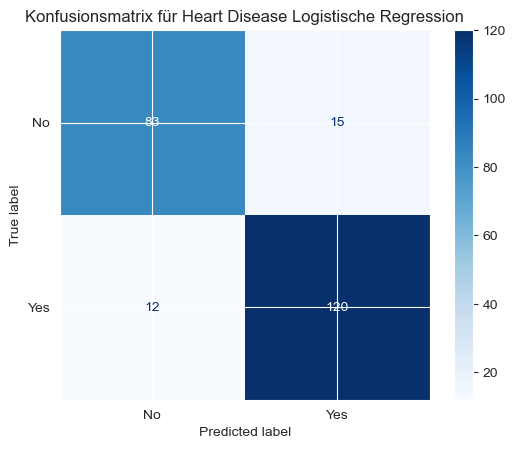

Genauigkeit: 0.8826086956521739

Fairness-Analyse nach 'Sex':
     accuracy  precision    recall  selection_rate
Sex                                               
0    0.820513   0.615385  0.800000        0.333333
1    0.895288   0.918033  0.918033        0.638743
Demographic Parity Difference: 0.305


In [129]:
#Random Forest mit Gridsearch BALANCED

# 1. Daten vorbereiten: Heartdisease spalte und alte age Spalte entfernen
X = df.drop(columns=['HeartDisease', 'Age'])
y = df['HeartDisease']

# 2. Trainings-/Testdaten Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Parametergrid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# 4. Random Forest mit GridSearchCV + balanced
rfc = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

# 5. Beste Parameter und beste Score ausgeben
print("Beste Parameterkombination (grid_search.best_params_):")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBester CV-Score (grid_search.best_score_): {grid_search.best_score_:.4f}")
# 6. Modell evaluieren
best_model = grid_search.best_estimator_
y_pred_rand = best_model.predict(X_test)

#7. Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred_rand)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Konfusionsmatrix für Heart Disease Logistische Regression')
plt.show()

accuracy = accuracy_score(y_test, y_pred_rand)
print("Genauigkeit:", accuracy)

#8. Fairness-Analyse nach Geschlecht
# Sensitives Merkmal extrahieren (Sex)
sensitive_feature = df.loc[X_test.index, "Sex"]  # 0 = Female, 1 = Male

# MetricFrame mit Gruppenvergleich
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "selection_rate": selection_rate
}

frame = MetricFrame(metrics=metrics, y_true=y_test, y_pred=y_pred_rand, sensitive_features=sensitive_feature)

print("\nFairness-Analyse nach 'Sex':")
print(frame.by_group)

dp_diff = demographic_parity_difference(y_test, y_pred_rand, sensitive_features=sensitive_feature)
print(f"Demographic Parity Difference: {dp_diff:.3f}")


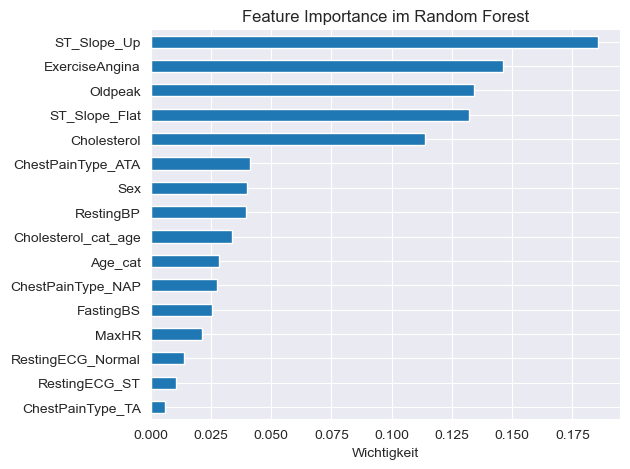

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True)
feat_imp.plot(kind='barh', title='Feature Importance im Random Forest')
plt.xlabel('Wichtigkeit')
plt.tight_layout()
plt.show()

Neue Verteilung im Training:
Sex
1    542
0    542
Name: count, dtype: int64
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Beste Parameterkombination (grid_search.best_params_):
  bootstrap: True
  max_depth: None
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 100

Bester CV-Score (grid_search.best_score_): 0.9068


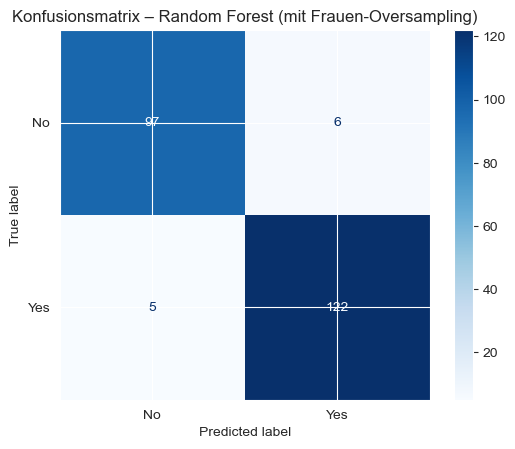

Genauigkeit: 0.9521739130434783

Fairness-Analyse nach 'Sex':
     accuracy  precision    recall  selection_rate
Sex                                               
0    1.000000       1.00  1.000000        0.170213
1    0.939891       0.95  0.957983        0.655738
Demographic Parity Difference: 0.486


In [131]:
#Random Forest MIT Oversamling der Frauen


# 1. Daten vorbereiten
X = df.drop(columns=['HeartDisease', 'Age'])
y = df['HeartDisease']

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# 3. Oversampling von Frauen im Trainingsteil
train_df = X_train.copy()
train_df["HeartDisease"] = y_train

# Get Frauen (Sex == 0) und Männer
women = train_df[train_df["Sex"] == 0]
men = train_df[train_df["Sex"] == 1]

# Frauen duplizieren, bis gleiche Anzahl wie Männer
women_oversampled = women.sample(n=len(men), replace=True, random_state=42)

# Kombinieren
train_balanced = pd.concat([men, women_oversampled])
X_train_balanced = train_balanced.drop(columns="HeartDisease")
y_train_balanced = train_balanced["HeartDisease"]

print(f"Neue Verteilung im Training:\n{X_train_balanced['Sex'].value_counts()}")

# 4. Parametergrid
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# 5. GridSearchCV
rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_balanced, y_train_balanced)

# 6. Bestes Modell
print("Beste Parameterkombination (grid_search.best_params_):")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBester CV-Score (grid_search.best_score_): {grid_search.best_score_:.4f}")

# 7. Vorhersage & Evaluation
y_pred_rand = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rand)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Konfusionsmatrix – Random Forest (mit Frauen-Oversampling)')
plt.show()

accuracy = accuracy_score(y_test, y_pred_rand)
print("Genauigkeit:", accuracy)

# 8. Fairness-Analyse
sensitive_feature = df.loc[X_test.index, "Sex"]  # 0 = Female, 1 = Male

metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "selection_rate": selection_rate
}

frame = MetricFrame(metrics=metrics, y_true=y_test, y_pred=y_pred_rand, sensitive_features=sensitive_feature)

print("\nFairness-Analyse nach 'Sex':")
print(frame.by_group)

dp_diff = demographic_parity_difference(y_test, y_pred_rand, sensitive_features=sensitive_feature)
print(f"Demographic Parity Difference: {dp_diff:.3f}")


Neue Verteilung im Training:
Sex
1    542
0    542
Name: count, dtype: int64
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Beste Parameterkombination (grid_search.best_params_):
  bootstrap: True
  max_depth: None
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 100

Bester CV-Score (grid_search.best_score_): 0.9096


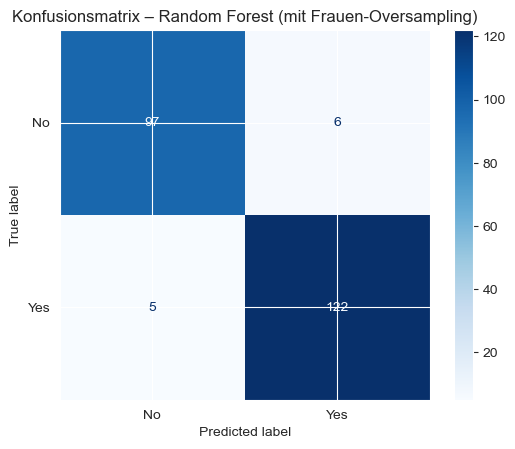

Genauigkeit: 0.9521739130434783

 Predictive Parity (Female): 1.000
 Predictive Parity (Male):   0.950
 Predictive Parity Difference: 0.050

Fairness-Analyse nach 'Sex':
     accuracy  precision    recall  selection_rate  false_positive_rate  \
Sex                                                                       
0    1.000000       1.00  1.000000        0.170213              0.00000   
1    0.939891       0.95  0.957983        0.655738              0.09375   

     true_positive_rate  
Sex                      
0              1.000000  
1              0.957983  
Demographic Parity Difference: 0.486


In [132]:
from fairlearn.metrics import false_positive_rate

#Random Forest MIT Oversamling der Frauen + balanced

# 1. Daten vorbereiten
X = df.drop(columns=['HeartDisease', 'Age'])
y = df['HeartDisease']

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# 3. Oversampling von Frauen im Trainingsteil
train_df = X_train.copy()
train_df["HeartDisease"] = y_train

# Get Frauen (Sex == 0) und Männer
women = train_df[train_df["Sex"] == 0]
men = train_df[train_df["Sex"] == 1]

# Frauen duplizieren, bis gleiche Anzahl wie Männer
women_oversampled = women.sample(n=len(men), replace=True, random_state=42)

# Kombinieren
train_balanced = pd.concat([men, women_oversampled])
X_train_balanced = train_balanced.drop(columns="HeartDisease")
y_train_balanced = train_balanced["HeartDisease"]

print(f"Neue Verteilung im Training:\n{X_train_balanced['Sex'].value_counts()}")

# 4. Parametergrid
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# 5. GridSearchCV
rfc = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_balanced, y_train_balanced)
best_forest_model = grid_search.best_estimator_
# 6. Bestes Modell
print("Beste Parameterkombination (grid_search.best_params_):")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBester CV-Score (grid_search.best_score_): {grid_search.best_score_:.4f}")

# 7. Vorhersage & Evaluation
y_pred_rand = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rand)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Konfusionsmatrix – Random Forest (mit Frauen-Oversampling)')
plt.show()

accuracy = accuracy_score(y_test, y_pred_rand)
print("Genauigkeit:", accuracy)

#Konfusionsmatrix nach mann und frau
# True-Labels und Vorhersagen für jede Gruppe extrahieren
y_true_female = y_test[sensitive_feature == 0]
y_pred_female = y_pred_rand[sensitive_feature == 0]

y_true_male = y_test[sensitive_feature == 1]
y_pred_male = y_pred_rand[sensitive_feature == 1]

# Precision (predictive parity) für beide Gruppen
precision_female = precision_score(y_true_female, y_pred_female)
precision_male = precision_score(y_true_male, y_pred_male)

# Predictive Parity Difference berechnen
pp_diff = abs(precision_female - precision_male)

print(f"\n Predictive Parity (Female): {precision_female:.3f}")
print(f" Predictive Parity (Male):   {precision_male:.3f}")
print(f" Predictive Parity Difference: {pp_diff:.3f}")

# 8. Fairness-Analyse
sensitive_feature = df.loc[X_test.index, "Sex"]  # 0 = Female, 1 = Male

metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "selection_rate": selection_rate,
    "false_positive_rate": false_positive_rate,
    "true_positive_rate": true_positive_rate
}

frame = MetricFrame(metrics=metrics, y_true=y_test, y_pred=y_pred_rand, sensitive_features=sensitive_feature)

print("\nFairness-Analyse nach 'Sex':")
print(frame.by_group)

dp_diff = demographic_parity_difference(y_test, y_pred_rand, sensitive_features=sensitive_feature)
print(f"Demographic Parity Difference: {dp_diff:.3f}")

ST_Slope_Up: 0.0696 ± 0.0115
Cholesterol: 0.0535 ± 0.0128
Sex: 0.0470 ± 0.0089
ExerciseAngina: 0.0404 ± 0.0083
FastingBS: 0.0378 ± 0.0075
Oldpeak: 0.0291 ± 0.0148
ST_Slope_Flat: 0.0209 ± 0.0084
ChestPainType_NAP: 0.0170 ± 0.0069
MaxHR: 0.0096 ± 0.0058
Cholesterol_cat_age: 0.0078 ± 0.0070


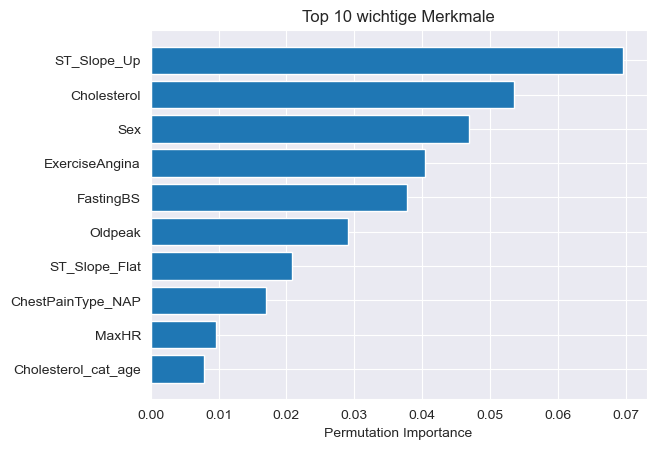

In [136]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_forest_model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')

# Sortieren der Features nach Wichtigkeit
sorted_idx = result.importances_mean.argsort()[::-1]
for i in sorted_idx[:10]:
    print(f"{X_test.columns[i]}: {result.importances_mean[i]:.4f} ± {result.importances_std[i]:.4f}")

# Optional: Plot
import matplotlib.pyplot as plt

plt.barh(X_test.columns[sorted_idx[:10]][::-1], result.importances_mean[sorted_idx[:10]][::-1])
plt.xlabel("Permutation Importance")
plt.title("Top 10 wichtige Merkmale")
plt.show()

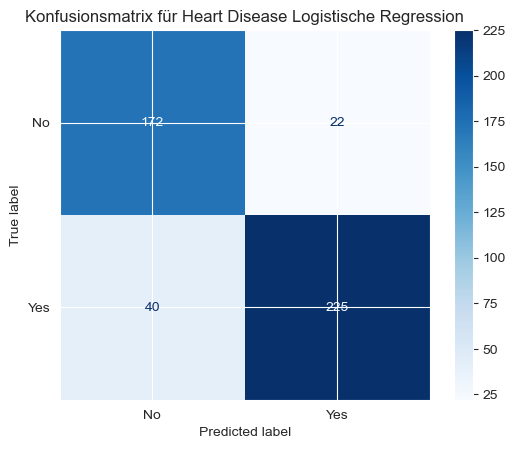

Genauigkeit: 0.8649237472766884


In [105]:
#logisticRegeression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop('HeartDisease', axis=1)
X = pd.get_dummies(X, drop_first=True)

y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

modelLogistic = LogisticRegression(max_iter=1000,class_weight='balanced')
modelLogistic.fit(X_train, y_train)

y_pred = modelLogistic.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Konfusionsmatrix für Heart Disease Logistische Regression')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit:", accuracy)


In [106]:
from sklearn.metrics import precision_score, recall_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference


# Wiederhole Vorhersagen
y_pred = modelLogistic.predict(X_test)

# Sensitives Merkmal extrahieren (Sex)
sensitive_feature = df.loc[X_test.index, "Sex"]  # 0 = Female, 1 = Male

# MetricFrame mit Gruppenvergleich
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "selection_rate": selection_rate
}

frame = MetricFrame(metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_feature)

print("Fairness-Analyse nach 'Sex':")
print(frame.by_group)

dp_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_feature)
print(f"Demographic Parity Difference: {dp_diff:.3f}")

Fairness-Analyse nach 'Sex':
     accuracy  precision    recall  selection_rate
Sex                                               
0    0.858696   0.782609  0.692308        0.250000
1    0.866485   0.924107  0.866109        0.610354
Demographic Parity Difference: 0.360


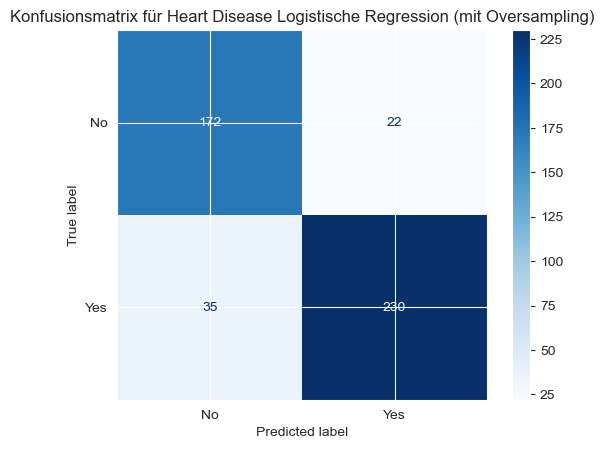

Genauigkeit: 0.8758169934640523
Fairness-Analyse nach 'Sex':
     accuracy  precision    recall  selection_rate
Sex                                               
0    0.869565   0.791667  0.730769        0.260870
1    0.877384   0.925439  0.882845        0.621253
Demographic Parity Difference: 0.360


In [107]:
#lr mit oversampling der Frauen
# 1. Features und Ziel
X = df.drop('HeartDisease', axis=1)
X = pd.get_dummies(X, drop_first=True)

y = df['HeartDisease']

# 2. Trainings-/Testsplit
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# 3. Oversampling der Frauen (Sex_1 == 0, also 'nicht männlich')
# Finde Index der Frauen im Trainingsset:
frauen_idx = X_train[X_train.get('Sex', 0) == 0].index
maenner_idx = X_train[X_train.get('Sex', 0) == 1].index

# Oversample Frauen auf Männeranzahl
frauen_oversampled = X_train.loc[frauen_idx].sample(n=len(maenner_idx), replace=True, random_state=42)
y_frauen_oversampled = y_train.loc[frauen_oversampled.index]

# Neues Training-Set zusammenbauen
X_train_balanced = pd.concat([X_train.loc[maenner_idx], frauen_oversampled])
y_train_balanced = pd.concat([y_train.loc[maenner_idx], y_frauen_oversampled])

# 4. Modell trainieren
modelLogistic = LogisticRegression(max_iter=1000, class_weight='balanced')
modelLogistic.fit(X_train_balanced, y_train_balanced)

# 5. Vorhersage und Evaluation
y_pred_log = modelLogistic.predict(X_test)

cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Konfusionsmatrix für Heart Disease Logistische Regression (mit Oversampling)')
plt.show()

accuracy = accuracy_score(y_test, y_pred_log)
print("Genauigkeit:", accuracy)

#Fairness
# Sensitives Merkmal extrahieren (Sex)
sensitive_feature = df.loc[X_test.index, "Sex"]  # 0 = Female, 1 = Male

# MetricFrame mit Gruppenvergleich
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "selection_rate": selection_rate
}

frame = MetricFrame(metrics=metrics, y_true=y_test, y_pred=y_pred_log, sensitive_features=sensitive_feature)

print("Fairness-Analyse nach 'Sex':")
print(frame.by_group)

dp_diff = demographic_parity_difference(y_test, y_pred_log, sensitive_features=sensitive_feature)
print(f"Demographic Parity Difference: {dp_diff:.3f}")


/opt/anaconda3/envs/Asai-Projekt/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:03:57] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[10:03:57] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[10:03:57] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[10:03:57] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[10:03:57] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abw

🔍 Genauigkeit des Stacking-Modells: 0.8956521739130435


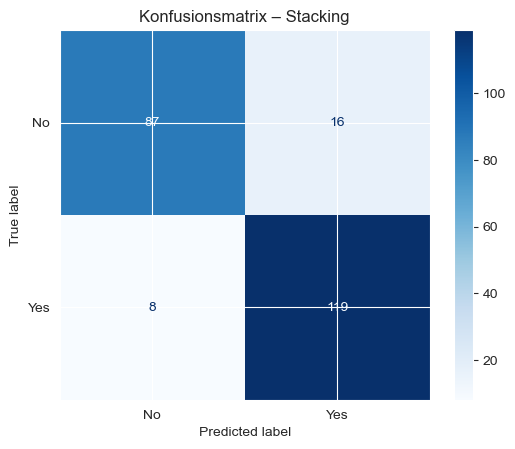


📋 Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       103
           1       0.88      0.94      0.91       127

    accuracy                           0.90       230
   macro avg       0.90      0.89      0.89       230
weighted avg       0.90      0.90      0.90       230



In [108]:
#stacking
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Daten vorbereiten
X = df.drop(columns=["HeartDisease", "Age"])
X = pd.get_dummies(X, drop_first=True)
y = df["HeartDisease"]

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 3. Basis-Modelle definieren mit spezifischen Parametern
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

lr_model = LogisticRegression(max_iter=1000, solver='liblinear')

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 4. Meta-Modell
meta_model = LogisticRegression(max_iter=1000)

# 5. StackingClassifier
stack_model = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lr', lr_model)
    ],
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=False
)

# 6. Training
stack_model.fit(X_train, y_train)

# 7. Vorhersage
y_pred_stack = stack_model.predict(X_test)

# 8. Auswertung
accuracy = accuracy_score(y_test, y_pred_stack)
print("🔍 Genauigkeit des Stacking-Modells:", accuracy)

cm = confusion_matrix(y_test, y_pred_stack)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(cmap="Blues")
plt.title("Konfusionsmatrix – Stacking")
plt.show()

print("\n📋 Klassifikationsbericht:")
print(classification_report(y_test, y_pred_stack))
